In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sl=pd.read_csv('/content/stores_sales_forecasting.csv', encoding='latin-1')

In [3]:
sl.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
sl.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [5]:
sl.shape

(2121, 21)

In [6]:
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [7]:
sl.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


**Data** **Analysis**


In [8]:
sl.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [9]:
sl.Region.value_counts()

,count
Region,
West,707
East,601
Central,481
South,332


In [10]:
sl.Profit.value_counts()

,count
Profit,
0.0000,33
10.3936,5
2.9568,5
15.5250,4
60.3920,4
...,...
-52.3392,1
-8.9152,1
29.8802,1


In [11]:
sl.Category.value_counts()

,count
Category,
Furniture,2121


In [12]:
sl.City.value_counts()

,count
City,
New York City,192
Los Angeles,154
Philadelphia,111
San Francisco,102
Seattle,97
...,...
Tyler,1
Port Arthur,1
Citrus Heights,1


In [13]:
sl.duplicated().sum()

0

In [14]:
sl.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


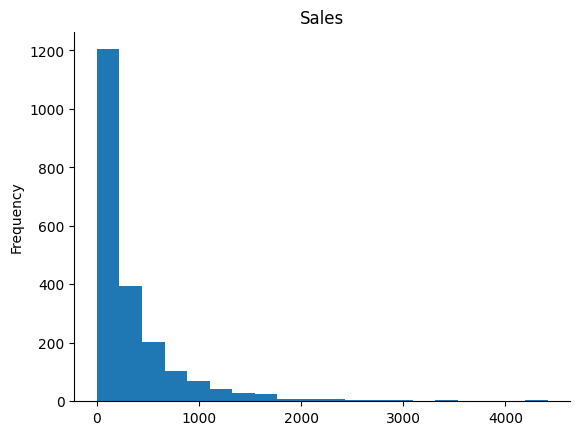

In [15]:

from matplotlib import pyplot as plt
sl['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
duplicate_rows = sl[sl.duplicated()]
duplicate_rows.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [17]:
sl = sl.drop_duplicates()
sl.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [18]:
sl['Order Date'] = pd.to_datetime(sl['Order Date'])
sl.set_index('Order Date', inplace=True)
monthly_sales = sl['Sales'].resample('M').sum()
monthly_sales

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


<Axes: xlabel='Region'>

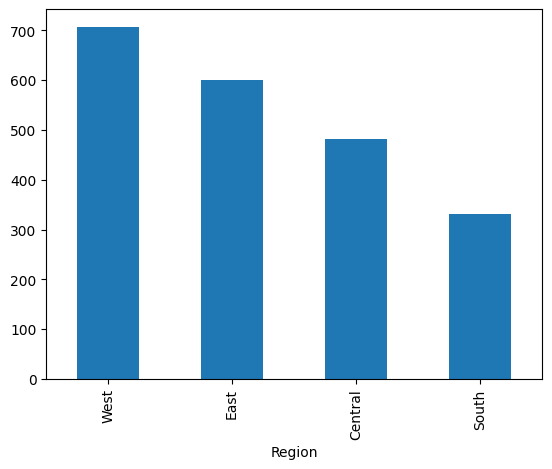

In [19]:
sl.Region.value_counts().plot(kind = "bar")

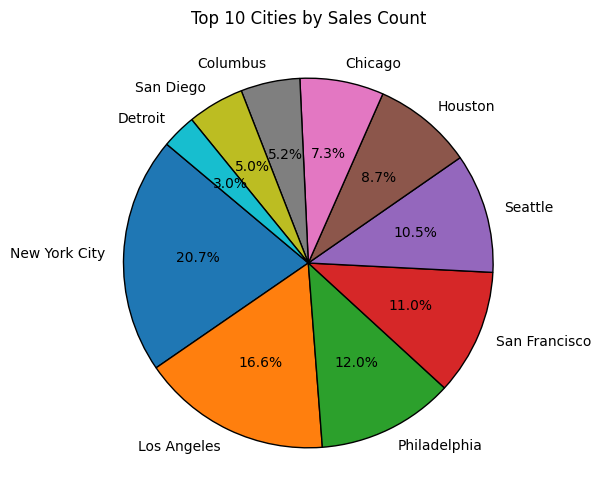

In [20]:
top_cities = sl.City.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind="pie", autopct="%1.1f%%", startangle=140, colormap="tab10", wedgeprops={'edgecolor': 'black'})

plt.ylabel("")
plt.title("Top 10 Cities by Sales Count")
plt.show()


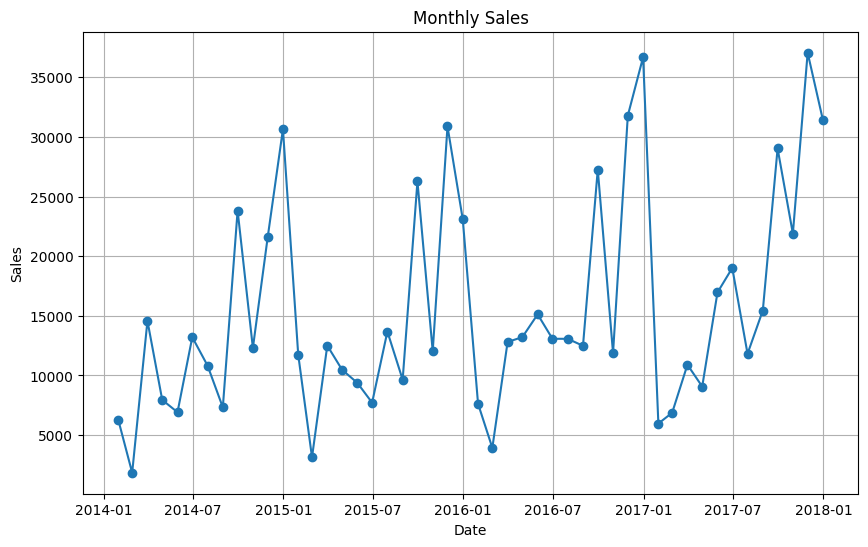

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

**Model** **Building**


In [22]:
sl.head(10)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
2017-07-16,24,US-2017-156909,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
2015-09-25,25,CA-2015-106320,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
2015-09-17,28,US-2015-150630,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
2015-09-17,30,US-2015-150630,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250


In [23]:
sales = sl[[ 'Sales', 'Profit']]
print(sales.head())

                Sales    Profit
Order Date                     
2016-11-08   261.9600   41.9136
2016-11-08   731.9400  219.5820
2015-10-11   957.5775 -383.0310
2014-06-09    48.8600   14.1694
2014-06-09  1706.1840   85.3092


**Data** **Training**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Prepare the data
X = sl[['Profit']]
y = sl['Sales']

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)



In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 292796.5109698537
R-squared: 0.044460704986213684


**Visualizing**

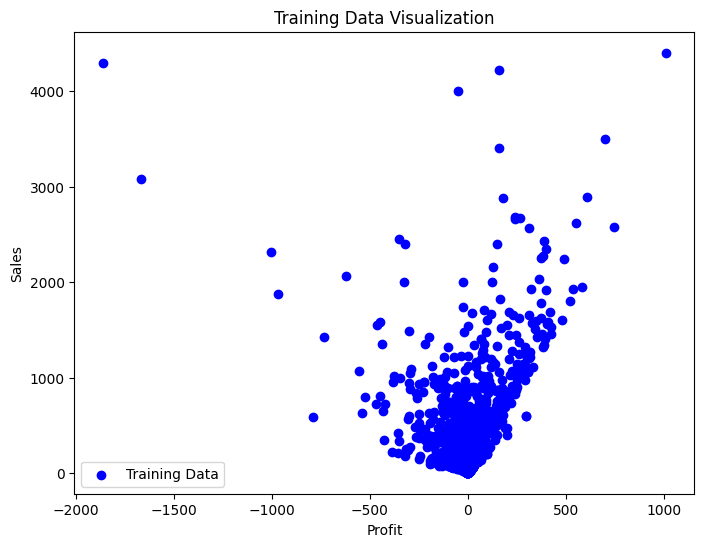

In [30]:
# Visualize the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Training Data Visualization')
plt.legend()
plt.show()

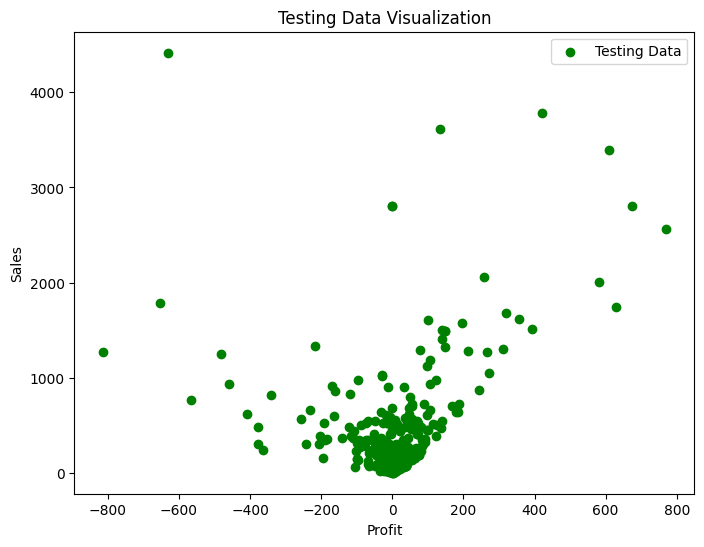

In [31]:
# Visualize the testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Testing Data Visualization')
plt.legend()
plt.show()

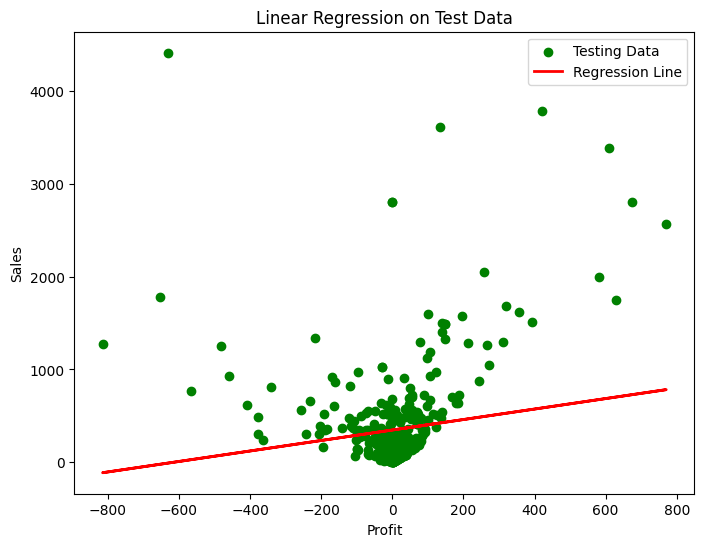

In [32]:
# Visualize the regression line on the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Linear Regression on Test Data')
plt.legend()
plt.show()

***Evalution***

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 292796.5109698537
R-squared: 0.044460704986213684


In [34]:
# Aggregate data (example: average sales per region)
region_sales = sl.groupby('Region')['Sales'].mean()
print("\nAverage Sales per Region:\n", region_sales)

# Aggregate data (example: total profit per category)
category_profit = sl.groupby('Category')['Profit'].sum()
print("\nTotal Profit per Category:\n", category_profit)


Average Sales per Region:
 Region
Central    340.534644
East       346.574383
South      353.309289
West       357.302325
Name: Sales, dtype: float64

Total Profit per Category:
 Category
Furniture    18451.2728
Name: Profit, dtype: float64


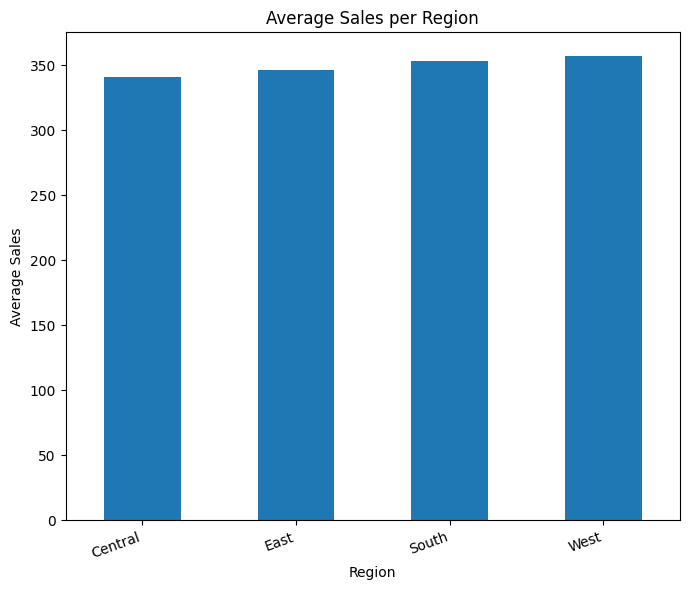

In [35]:
# Average Sales per Region visualization
region_sales.plot(kind='bar', figsize=(7, 6))
plt.title('Average Sales per Region')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

In [36]:
# Aggregate data (example: total sales per city)
city_sales = sl.groupby('City')['Sales'].sum()
print("\nTotal Sales per City:\n", city_sales)




Total Sales per City:
 City
Akron          433.5960
Alexandria     267.4600
Allen          244.0060
Allentown       11.6480
Amarillo      3048.5828
                ...    
Wilson         163.1360
Woodstock      845.4880
Woonsocket      52.9600
Yonkers        851.4820
York           422.0580
Name: Sales, Length: 371, dtype: float64


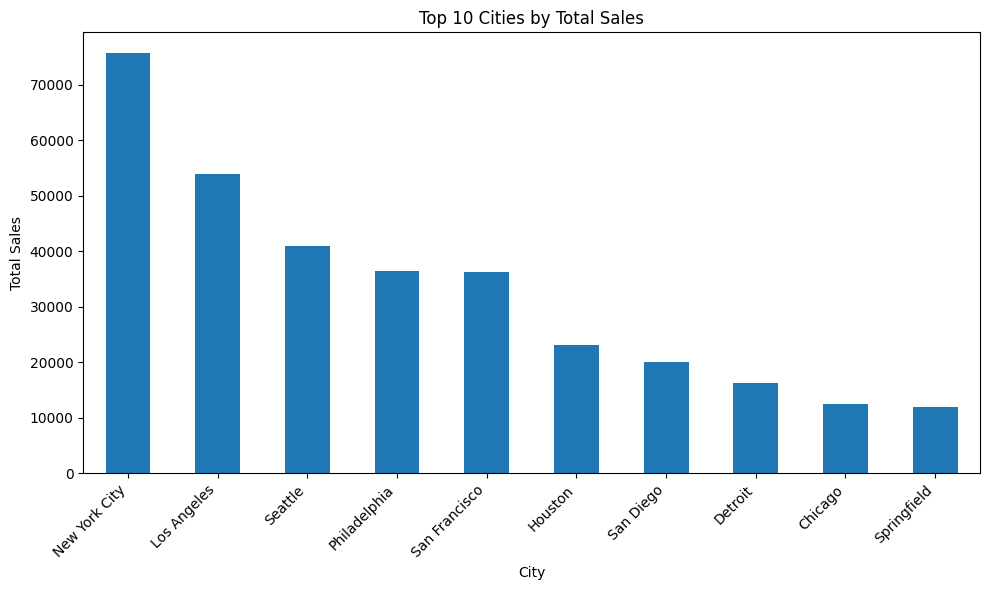

In [37]:
# Visualize total sales per city (top 10)
top_10_cities_sales = city_sales.sort_values(ascending=False).head(10)
top_10_cities_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [38]:
# Aggregate data (example: median profit per sub-category)
subcategory_profit = sl.groupby('Sub-Category')['Profit'].median()
print("\nMedian Profit per Sub-Category:\n", subcategory_profit)




Median Profit per Sub-Category:
 Sub-Category
Bookcases       4.1333
Chairs         13.3176
Furnishings     9.1020
Tables        -31.3722
Name: Profit, dtype: float64


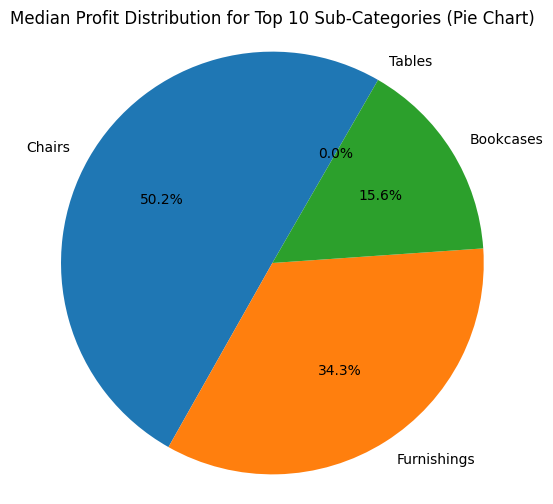

In [39]:
top_n = 10  # Number of top sub-categories to show in the pie chart

# Make negative values zero
top_subcategory_profit = subcategory_profit.clip(lower=0)

# Select top sub-categories after clipping
top_subcategory_profit = top_subcategory_profit.nlargest(top_n)

plt.figure(figsize=(6, 6))
plt.pie(top_subcategory_profit, labels=top_subcategory_profit.index, autopct='%1.1f%%', startangle=60)
plt.title(f'Median Profit Distribution for Top {top_n} Sub-Categories (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

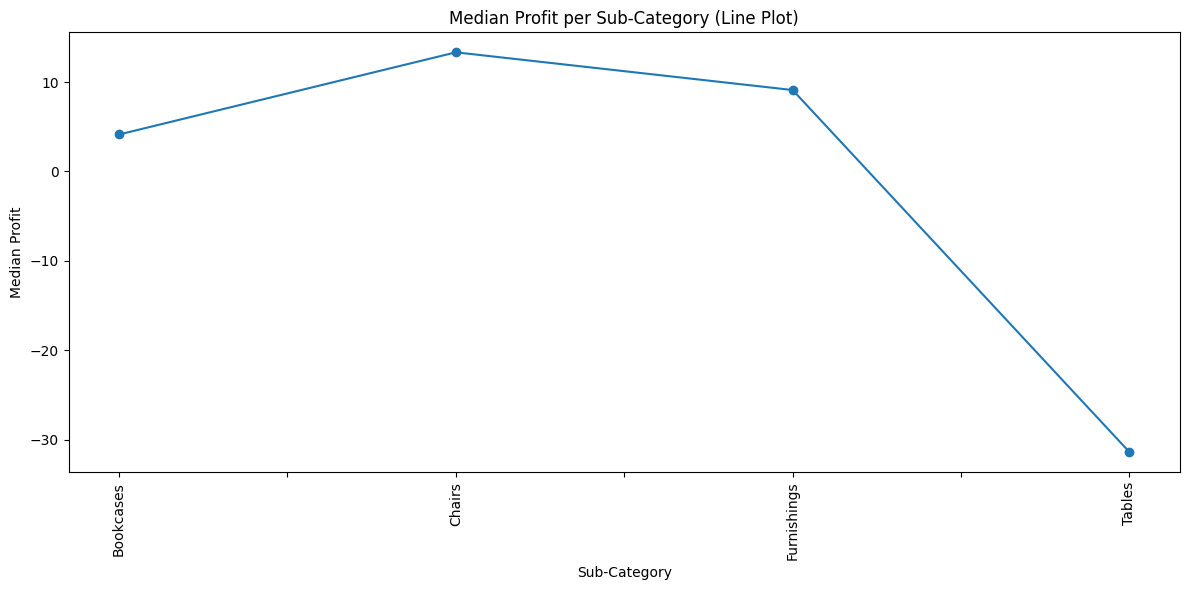

In [40]:
#visualizing all negative values also
plt.figure(figsize=(12, 6))
subcategory_profit.plot(kind='line', marker='o')
plt.title('Median Profit per Sub-Category (Line Plot)')
plt.xlabel('Sub-Category')
plt.ylabel('Median Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Exploratory Data** **Analysis** (**EDA**) **and** **Preprocessing**

In [41]:
# 1. Feature Engineering: Create new features based on existing ones.
# Example: Create a 'Sales per Unit Price' feature.
if 'Unit Price' in sl.columns:  # Check if column exists
    sl['Sales per Unit Price'] = sl['Sales'] / sl['Unit Price']
else:
    print("Warning: 'Unit Price' column not found. Cannot create 'Sales per Unit Price'.")

# 2. Outlier Detection and Treatment:
# Example: Identify and handle outliers in 'Sales' using IQR.
Q1 = sl['Sales'].quantile(0.25)
Q3 = sl['Sales'].quantile(0.75)
IQR = Q3 - Q1
sl = sl[~((sl['Sales'] < (Q1 - 1.5 * IQR)) | (sl['Sales'] > (Q3 + 1.5 * IQR)))]

# 3. Handling Categorical Features:
# One-hot encoding or label encoding for categorical columns.

# Example: Convert 'Region' and 'Category' to numerical representations
sl = pd.get_dummies(sl, columns=['Region', 'Category'], drop_first=True) # Example

# 4. Scaling Numerical Features:
# Scaling or normalization for numerical features (e.g. using MinMaxScaler or StandardScaler).
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['Sales', 'Profit'] # Add more if needed
sl[numerical_cols] = scaler.fit_transform(sl[numerical_cols])

# 5. Feature Selection:  Identify the most relevant features for your model.
# (Example: Using SelectKBest, recursive feature elimination, etc.)

# 6. Data Splitting (if not already done)
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X = sl.drop('Sales', axis=1) # Assumes 'Sales' is your target variable. Change accordingly.
y = sl['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(sl.head()) # to visualize preprocessed data

            Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
2016-11-08       1  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-11-08       2  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2015-10-11       4  US-2015-108966  10/18/2015  Standard Class    SO-20335   
2014-06-09       6  CA-2014-115812   6/14/2014  Standard Class    BH-11710   
2017-07-16      24  US-2017-156909   7/18/2017    Second Class    SF-20065   

              Customer Name   Segment        Country             City  \
Order Date                                                              
2016-11-08      Claire Gute  Consumer  United States        Henderson   
2016-11-08      Claire Gute  Consumer  United States        Henderson   
2015-10-11   Sean O'Donnell  Consumer  United States  Fort Lauderdale   
2014-06-09  Brosina Hoffman  Consumer  United States      Los Angeles   
2017-07-16  San

In [42]:
import seaborn as sns

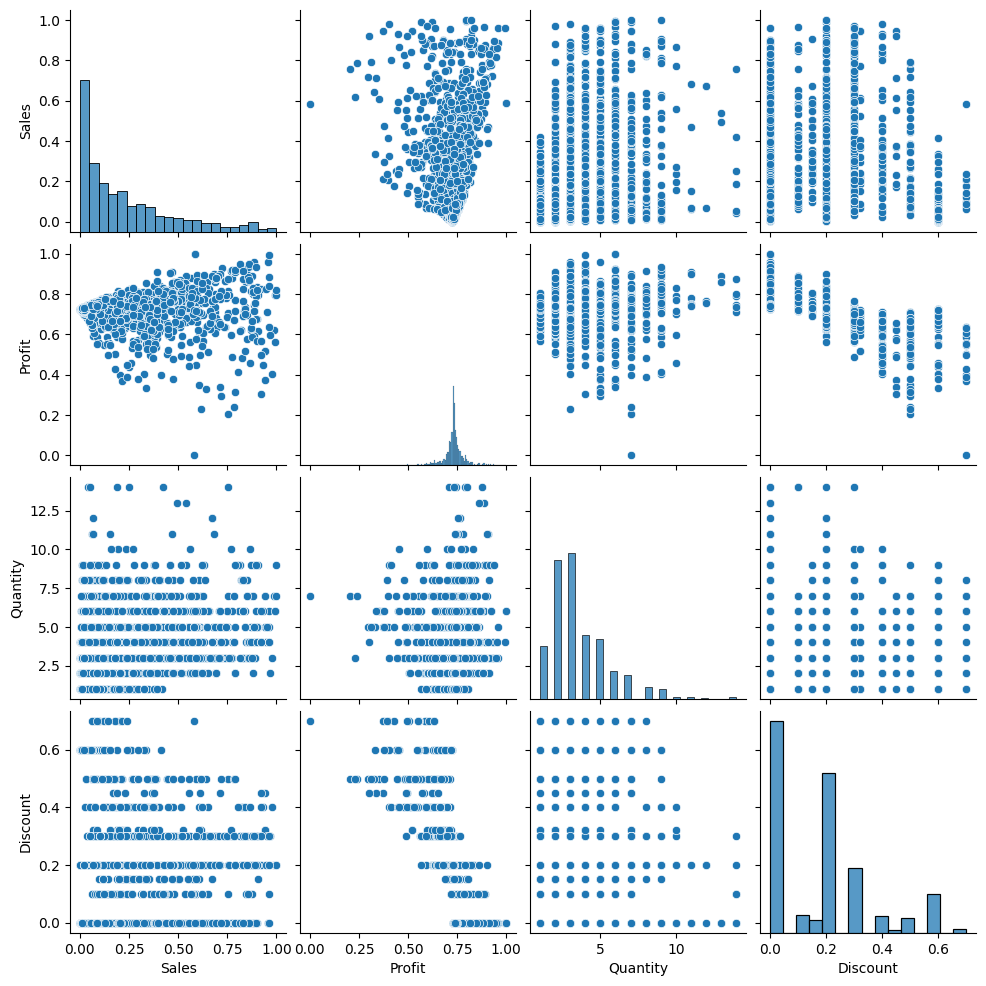

In [43]:
# Pairplot for relationships between numerical features
sns.pairplot(sl[['Sales', 'Profit', 'Quantity', 'Discount']]) #add other numerical features as needed
plt.show()



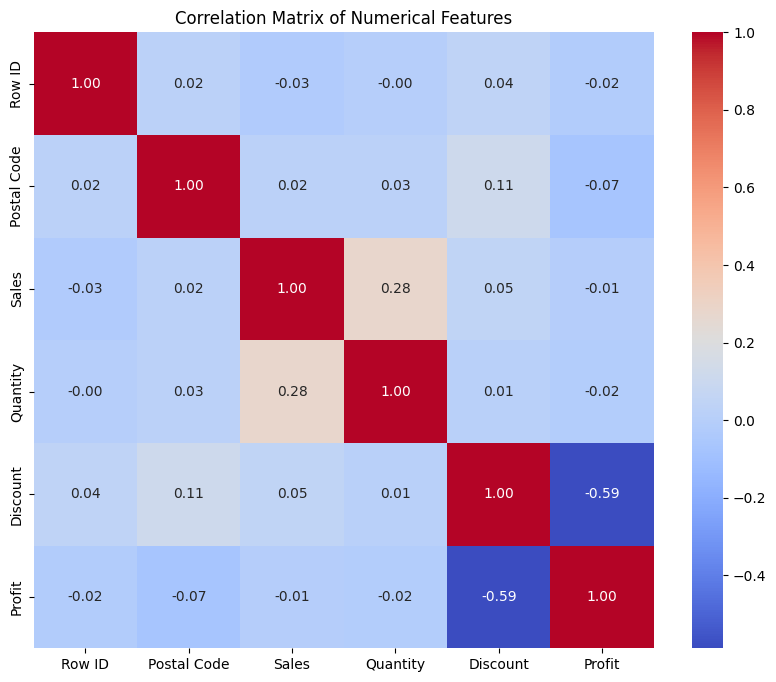

In [44]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Include only numerical features for correlation calculation
numerical_features = sl.select_dtypes(include=np.number).columns.tolist() # select numerical features
correlation_matrix = sl[numerical_features].corr()  # Calculate correlation for numerical features only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

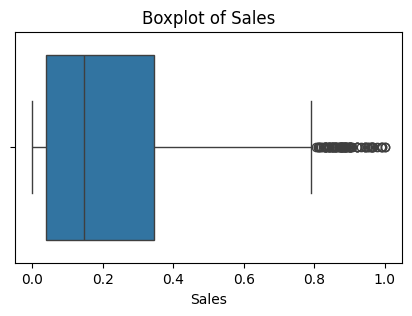

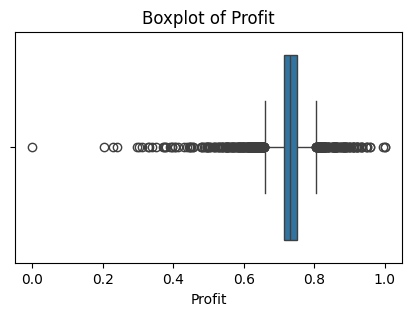

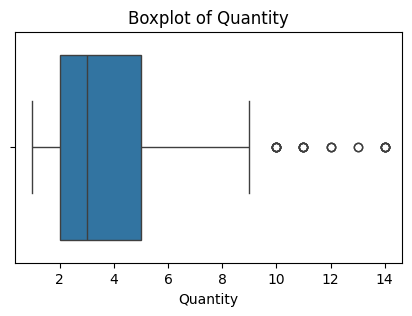

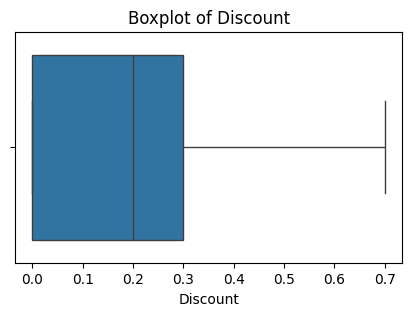

In [45]:
# Box plots to visualize distributions and identify outliers for numerical features
numerical_features = ['Sales', 'Profit', 'Quantity', 'Discount'] #add more as needed

for col in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=sl[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



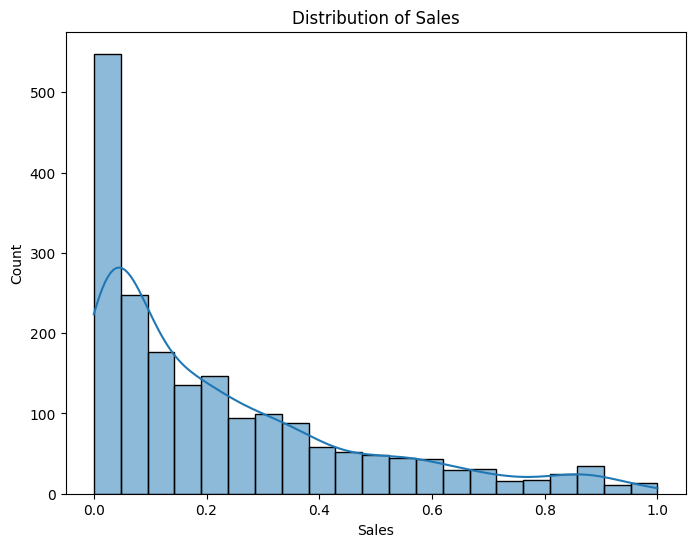

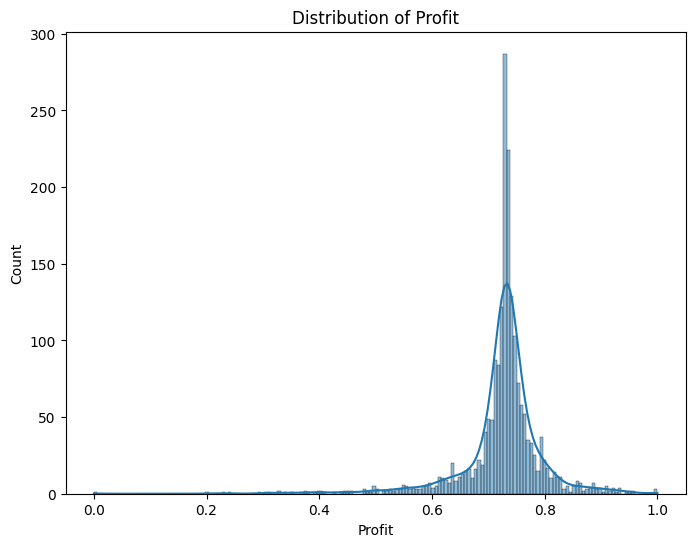

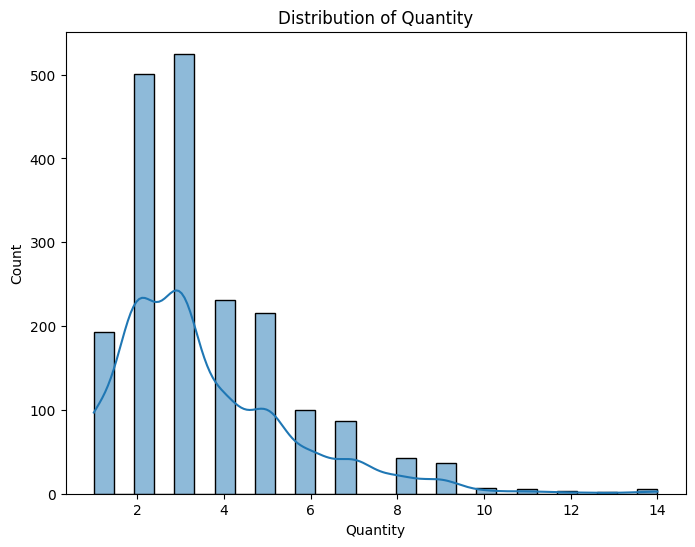

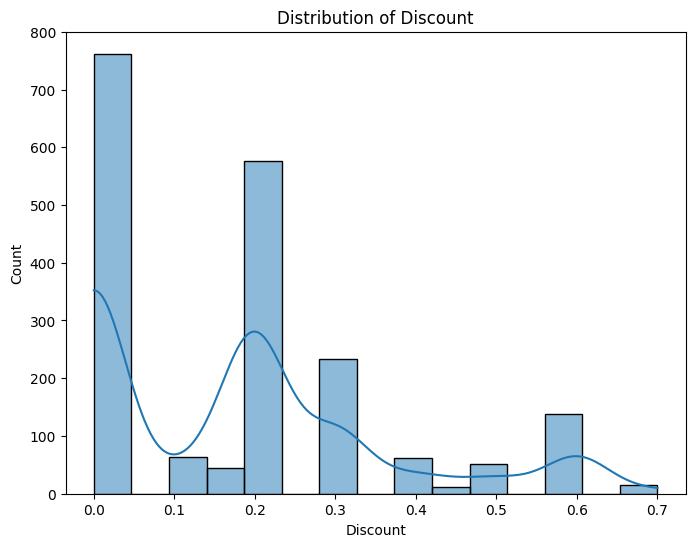

In [46]:
# Histograms for distributions of numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(sl[col], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.show()




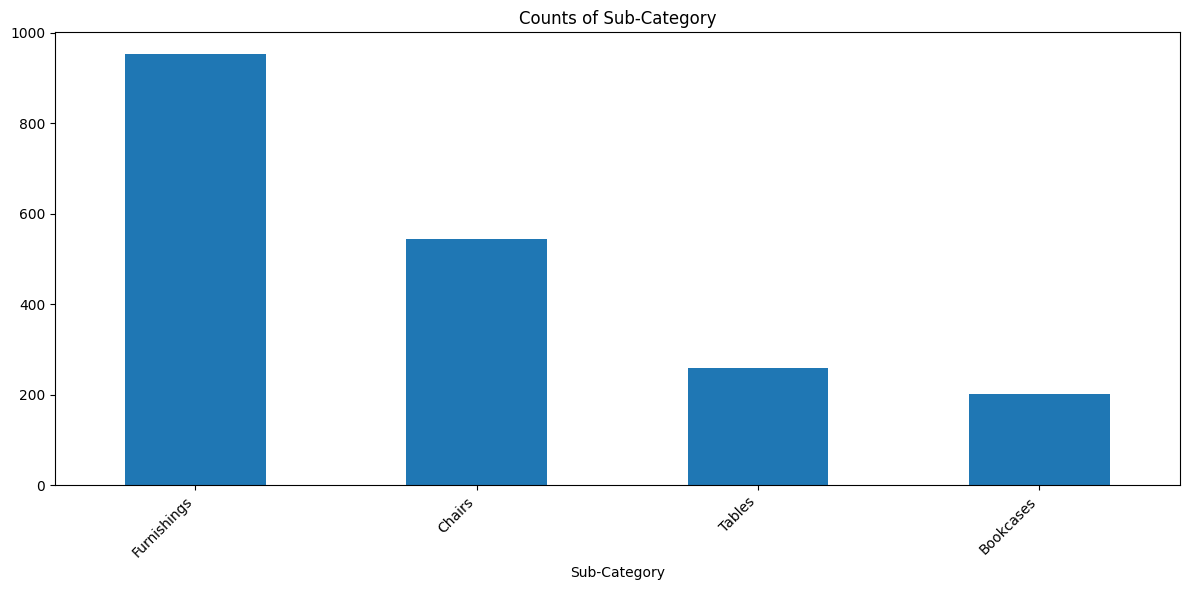

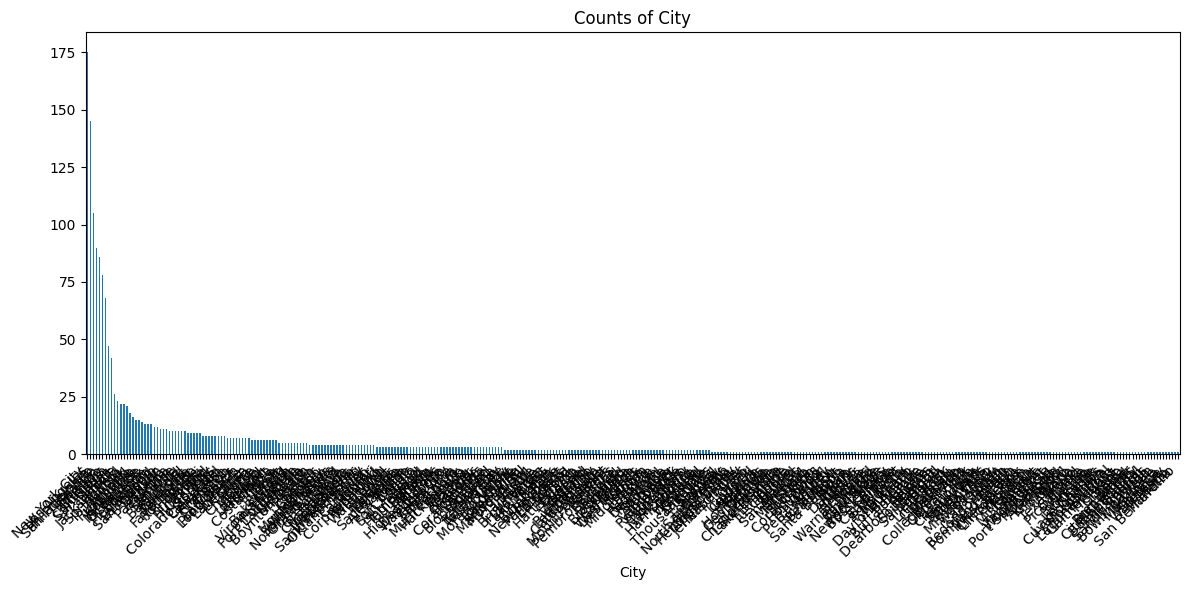

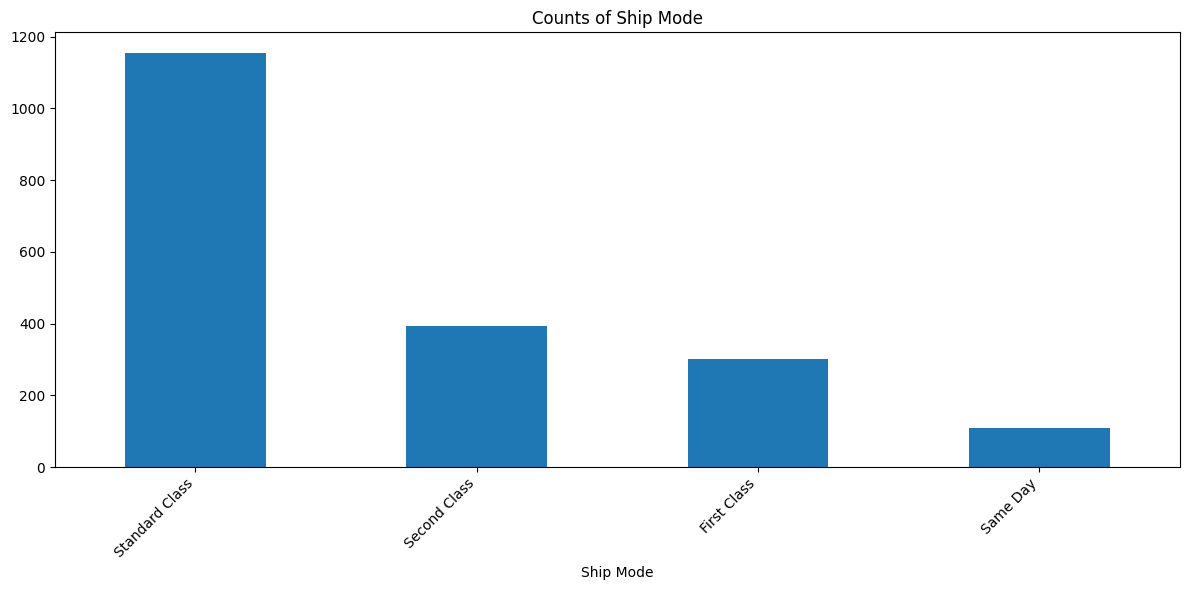

In [47]:
# Bar plots for categorical features
categorical_features = [ 'Sub-Category', 'City', 'Ship Mode'] #add more as needed

for col in categorical_features:
  plt.figure(figsize=(12, 6))
  sl[col].value_counts().plot(kind='bar')
  plt.title(f'Counts of {col}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()



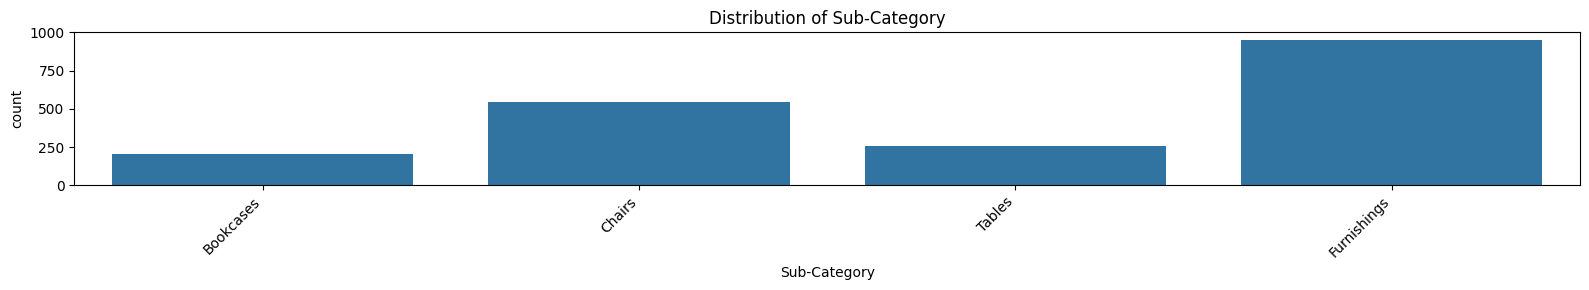

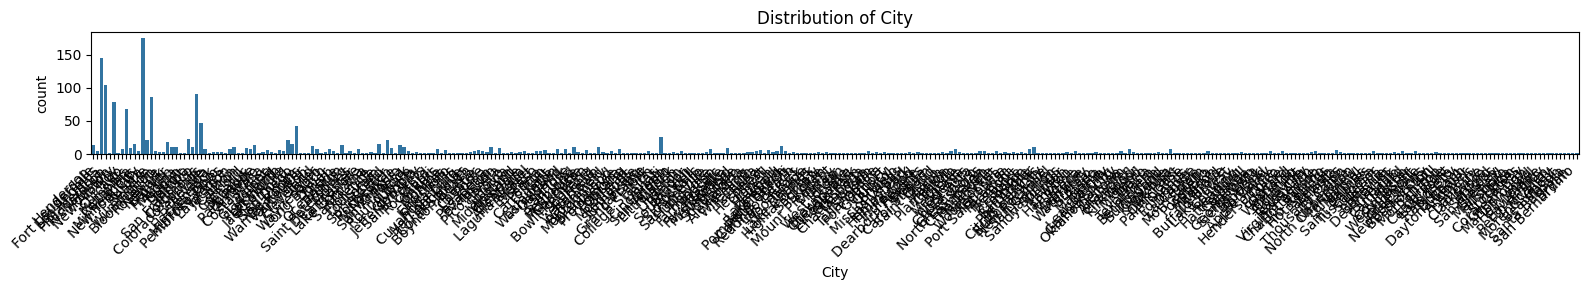

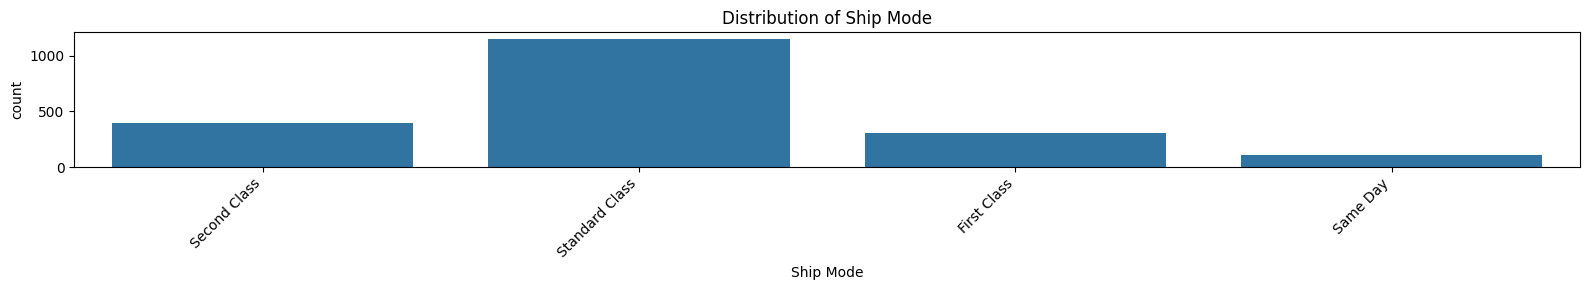

In [48]:
# Countplot (using seaborn) for categorical feature distributions
for col in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.countplot(x=col, data=sl)  # Use sl directly
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

**Summary To Compare and Visualize**

In [50]:
#@title Create a 'Sales per Unit Price' feature.
if 'Unit Price' in sl.columns:  # Check if column exists
    sl['Sales per Unit Price'] = sl['Sales'] / sl['Unit Price']
else:
    print("Warning: 'Unit Price' column not found. Cannot create 'Sales per Unit Price'.")

In [51]:
# @title Identify and handle outliers in 'Sales' using IQR.
Q1 = sl['Sales'].quantile(0.25)
Q3 = sl['Sales'].quantile(0.75)
IQR = Q3 - Q1
sl = sl[~((sl['Sales'] < (Q1 - 1.5 * IQR)) | (sl['Sales'] > (Q3 + 1.5 * IQR)))]

In [53]:
#@title Convert 'Region' and 'Category' to numerical representations
if 'Region' in sl.columns and 'Category' in sl.columns:  # Check if the columns exist
    sl = pd.get_dummies(sl, columns=['Region', 'Category'], drop_first=True)  # One-hot encode if columns are present
else:
    print("Warning: 'Region' or 'Category' columns have already been processed.") # Print message if columns are not present

In [54]:
#@title Scaling numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['Sales', 'Profit'] # Add more if needed
sl[numerical_cols] = scaler.fit_transform(sl[numerical_cols])

In [55]:
#@title Split data into training and testing sets
from sklearn.model_selection import train_test_split
X = sl.drop('Sales', axis=1) # Assumes 'Sales' is your target variable. Change accordingly.
y = sl['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Mtchine Learning Model**

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")

Linear Regression - Mean Squared Error: 0.057610988728166355
Linear Regression - R-squared: 0.04982685563523903


**Decision Tree**

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model_dt = DecisionTreeRegressor(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R-squared: {r2_dt}")

Decision Tree - Mean Squared Error: 0.032903059120680714
Decision Tree - R-squared: 0.4573326402809702


**Random Forest**

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model_rf = RandomForestRegressor(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Squared Error: 0.019632818736825975
Random Forest - R-squared: 0.6761975879300783


**Support Vector Machines (SVM)**

In [61]:
from sklearn.svm import SVR

# Initialize the model
model_svm = SVR()

# Train the model
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM - Mean Squared Error: {mse_svm}")
print(f"SVM - R-squared: {r2_svm}")

SVM - Mean Squared Error: 0.06483415499619272
SVM - R-squared: -0.06930421218142224


**Logistic Regression**

In [66]:
# Assuming 'Sales_Category' is a categorical representation of sales
from sklearn.linear_model import LogisticRegression
# ... (preprocessing to create Sales_Category)

# Convert 'Sales' to categorical 'Sales_Category' (example using binning)
# Define the bin edges (thresholds for categories)
bins = [0, 100, 200, 300, float('inf')]  # Example bins, adjust as needed
labels = ['Low', 'Medium', 'High', 'Very High']  # Corresponding labels for categories
sl['Sales_Category'] = pd.cut(sl['Sales'], bins=bins, labels=labels)

# Check for and handle NaN values in 'Sales_Category'
# Instead of fillna, add 'Unknown' to the categories
sl['Sales_Category'] = sl['Sales_Category'].cat.add_categories(['Unknown'])
sl['Sales_Category'] = sl['Sales_Category'].fillna('Unknown')  # Now fill NaN with 'Unknown'

# Split data into training and testing sets (use Sales_Category as the target)
# Select only numerical features for X
numerical_features = sl.select_dtypes(include=np.number).columns.tolist()
X = sl[numerical_features].drop(['Sales'], axis=1)  # Assumes 'Sales_Category' is the new target variable, drop Sales
y = sl['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train) # y_train would be Sales_Category
# ... (evaluation metrics adapted for categorical predictions)

LogisticRegression()

**Artificial Neural Networks (ANN)**

In [68]:
# Using TensorFlow/Keras for ANN implementation
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# ... (your previous code to define and compile model_ann) ...

# Before fitting the model, encode 'y_train' if it's categorical:
if y_train.dtype.name == 'category':
    encoder = LabelEncoder()
    y_train_encoded = encoder.fit_transform(y_train)
    model_ann.fit(X_train, y_train_encoded, epochs=10, batch_size=32) # Use encoded y_train
else:
    model_ann.fit(X_train, y_train, epochs=10, batch_size=32)  # Use original y_train if numerical

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1804005.5000
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9462.5996 
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321.9729
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230.1344
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178.0280
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152.8924
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.6817
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.2591
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.1105
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.1439


In [79]:
#@title Using TensorFlow/Keras for ANN implementation
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import StandardScaler
from sklearn.metrics import accuracy_score  # Import accuracy_score

# ... (your previous code for data preprocessing) ...

# Convert 'Sales' to categorical 'Sales_Category' (example using binning)
# Define the bin edges (thresholds for categories)
bins = [0, 100, 200, 300, float('inf')]  # Example bins, adjust as needed
labels = ['Low', 'Medium', 'High', 'Very High']  # Corresponding labels for categories
sl['Sales_Category'] = pd.cut(sl['Sales'], bins=bins, labels=labels)

# Check for and handle NaN values in 'Sales_Category'
# Instead of fillna, add 'Unknown' to the categories
sl['Sales_Category'] = sl['Sales_Category'].cat.add_categories(['Unknown'])
sl['Sales_Category'] = sl['Sales_Category'].fillna('Unknown')  # Now fill NaN with 'Unknown'


# Split data into training and testing sets (use Sales_Category as the target)
# Select only numerical features for X
numerical_features = sl.select_dtypes(include=np.number).columns.tolist()
X = sl[numerical_features].drop(['Sales'], axis=1)  # Assumes 'Sales_Category' is the new target variable, drop Sales
y = sl['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the model architecture (adjust output layer for classification)
# Assuming 'Sales_Category' is your target variable
# Get the number of categories from y_train instead of sl
num_categories = len(y_train.cat.categories)
model_ann = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_categories, activation='softmax')  # Output for multi-class classification
])

# Compile the model (use appropriate loss and metrics for classification)
model_ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Before fitting, check if y_train is categorical and encode if needed
# Create a LabelEncoder
encoder = LabelEncoder()

# Fit the encoder only on y_train (the training data)
encoder.fit(y_train)  # Fit on y_train to ensure all labels are seen

# Now transform y_train and y_test
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)  # Encode y_test using the same encoder

# Train the model using the encoded target variable
model_ann.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Make predictions (using the appropriate target variable type)
y_pred_ann_encoded = model_ann.predict(X_test)
y_pred_ann = encoder.inverse_transform(y_pred_ann_encoded.argmax(axis=1)) # Decode predictions

# Evaluate the model (using appropriate metrics for the target type)
accuracy_ann = accuracy_score(y_test, y_pred_ann)  # Use accuracy for classification

print(f"ANN - Accuracy: {accuracy_ann}")

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1840 - loss: 11483.2920
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 11.3197
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 5.0319
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 8.1588
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 4.0024
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 1.0264    
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 3.7457
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 9.8426 
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 1.5785    
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 1.5054    
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
ANN - Accuracy: 1.0


**Hyperparameter Tuning**

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming 'Sales' is the numerical target variable you want to predict
y = sl['Sales']  # Use the original numerical 'Sales' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

# Initialize the model
model_rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)  # Now y_train is numerical

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model_rf = RandomForestRegressor(random_state=42, **best_params)
best_model_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)